In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
silhouette_data = pd.read_csv('vehicle.csv')
print('Shape of data:',silhouette_data.shape)
silhouette_data.head()

Shape of data: (846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
silhouette_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
silhouette_data.isna().values.any()

True

In [5]:
silhouette_data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [6]:
silhouette_data.skew()
# As we can see "max.length_aspect_ratio" ,"scaled_radius_of_gyration.1" and "pr.axis_aspect_ratio" positively skewed.

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

In [7]:
silhouette_data.isna().sum()
# almost all independent variables have atleast one NAN value.
# Before replacing NAN value with median or mean value, 
# First check/visualise the skewness of the individual variable.
# Basically if data is skewed, replace NAN with median or with mean.
# Here, I am replacing all NAN values with median.

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# Analyse data

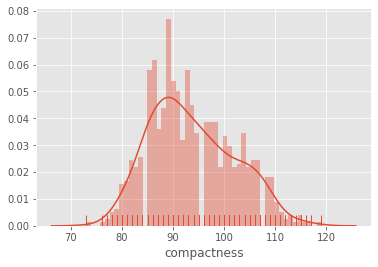

In [8]:
# Here, compactness is skewed, but not very high, we can consider.
# we can say that compactness is distributted normally.
sns.distplot(silhouette_data.compactness,bins=50,rug=True)

In [9]:
# let's check min and max of compactness and skewness.
# we consider this has normal distribution.
print(f" Min of compactness : {silhouette_data['compactness'].describe()[3]}")
print(f" Max of compactness : {silhouette_data['compactness'].describe()[7]}")
print(f" Skew of compactness : {silhouette_data['compactness'].skew()}")

 Min of compactness : 73.0
 Max of compactness : 119.0
 Skew of compactness : 0.38127063263996497


#### -----------------------------------------------

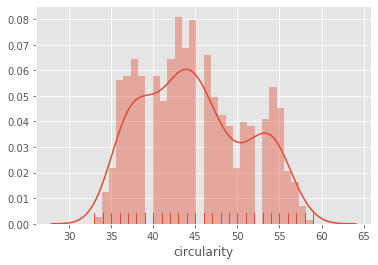

In [10]:
# Here, compactness is skewed, but not very high, we can consider.
# we can say that compactness is distributted normally.
# This graph is before replacing NAN values with median.
sns.distplot(silhouette_data.circularity,bins=30,rug=True)

In [11]:
# let's check min and max of circularity and skewness.
# we consider this has normal distribution.
print(f" Min of circularity : {silhouette_data['circularity'].describe()[3]}")
print(f" Max of circularity : {silhouette_data['circularity'].describe()[7]}")
print(f" Skew of circularity : {silhouette_data['circularity'].skew()}")

 Min of circularity : 33.0
 Max of circularity : 59.0
 Skew of circularity : 0.2618093968095735


In [12]:
# Before replacing nan
circularity_nan = pd.DataFrame(silhouette_data.circularity.isna())
silhouette_data[circularity_nan.circularity == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,NaN,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,NaN,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


circularity median value: 44.0
Number of NAN values : 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,44.0,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,44.0,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,44.0,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


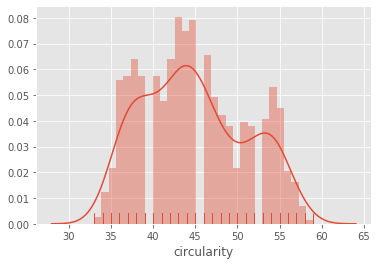

In [13]:
# lets replace NAN value with meadian from circularity and plot the graph.

circularity_medianValue = silhouette_data.circularity.median()
print("circularity median value:",circularity_medianValue)
silhouette_data.circularity.fillna(circularity_medianValue,inplace=True)
sns.distplot(silhouette_data.circularity,bins=30,rug=True)
print("Number of NAN values :",silhouette_data.circularity.isna().sum())
#After replacing nan
silhouette_data[circularity_nan.circularity == True]

In [14]:
# And we do not see much difference in circularity data distrbution.

#### --------------------------------------------------

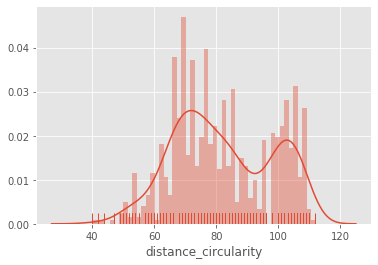

In [15]:
# As we can say that the distance_circularity data is distributted nirmally.
sns.distplot(silhouette_data.distance_circularity,bins=50,rug=True)

In [16]:
# we consider this has normal distribution.
# let's check min and max of distance_circularity and skewness.
# we consider this has normal distribution.
print(f" Min of distance_circularity : {silhouette_data['distance_circularity'].describe()[3]}")
print(f" Max of distance_circularity : {silhouette_data['distance_circularity'].describe()[7]}")
print(f" Skew of distance_circularity : {silhouette_data['distance_circularity'].skew()}")
# As we can see most of the data is distributted between 40 - 112

 Min of distance_circularity : 40.0
 Max of distance_circularity : 112.0
 Skew of distance_circularity : 0.10658485862853824


In [17]:
# Before replacing nan
distance_circularity_nan = pd.DataFrame(silhouette_data.distance_circularity.isna())
silhouette_data[distance_circularity_nan.distance_circularity == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
118,85,44.0,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
207,85,42.0,NaN,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
319,102,51.0,NaN,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus


distance_circularity median value: 80.0
Number of NAN values : 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
35,100,46.0,80.0,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
118,85,44.0,80.0,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
207,85,42.0,80.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
319,102,51.0,80.0,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus


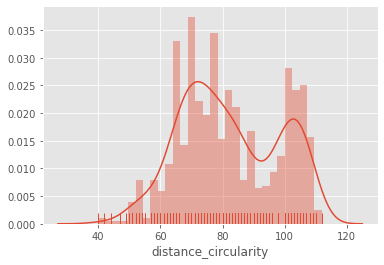

In [18]:
# lets replace NAN value with meadian from distance_circularity and plot the graph.

distance_circularity_medianValue = silhouette_data.distance_circularity.median()
print("distance_circularity median value:",distance_circularity_medianValue)
silhouette_data.distance_circularity.fillna(distance_circularity_medianValue,inplace=True)
sns.distplot(silhouette_data.distance_circularity,bins=30,rug=True)
print("Number of NAN values :",silhouette_data.distance_circularity.isna().sum())
#After replacing nan
silhouette_data[distance_circularity_nan.distance_circularity == True]

## -------------------------------------------------

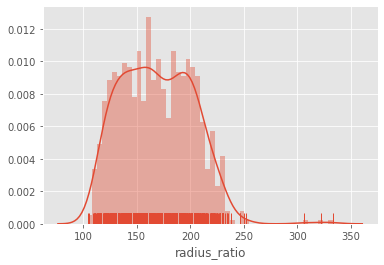

In [19]:
# Here, radius_ratio is positively skewed.
# This graph is before replacing NAN values with median.
sns.distplot(silhouette_data.radius_ratio,bins=50,rug=True)

In [20]:
# we consider this has normal distribution.
# let's check min and max of radius_ratio and skewness. And is positvely skewed.
# And the long tail, that might be containing outliers.
# we consider this has normal distribution. Only if data points between 100 to 250
print(f" Min of radius_ratio : {silhouette_data['radius_ratio'].describe()[3]}")
print(f" Max of radius_ratio : {silhouette_data['radius_ratio'].describe()[7]}")
print(f" Skew of radius_ratio : {silhouette_data['radius_ratio'].skew()}")

 Min of radius_ratio : 104.0
 Max of radius_ratio : 333.0
 Skew of radius_ratio : 0.39497766785104316


In [21]:
# Before replacing nan
radius_ratio_nan = pd.DataFrame(silhouette_data.radius_ratio.isna())
silhouette_data[radius_ratio_nan.radius_ratio == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,NaN,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,NaN,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,NaN,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,NaN,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


radius_ratio median value: 167.0
Number of NAN values : 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
9,93,44.0,98.0,167.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,167.0,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,167.0,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,167.0,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,167.0,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,167.0,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


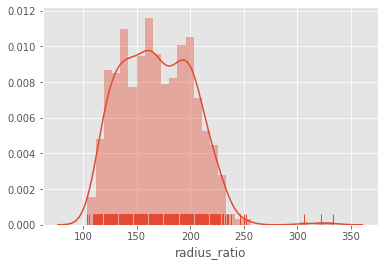

In [22]:
# lets replace NAN value with meadian from radius_ratio and plot the graph.
radius_ratio_medianValue = silhouette_data.radius_ratio.median()
print("radius_ratio median value:",radius_ratio_medianValue)
silhouette_data.radius_ratio.fillna(radius_ratio_medianValue,inplace=True)
sns.distplot(silhouette_data.radius_ratio,bins=30,rug=True)
print("Number of NAN values :",silhouette_data.radius_ratio.isna().sum())
#After replacing nan
silhouette_data[radius_ratio_nan.radius_ratio == True]

In [23]:
silhouette_data.radius_ratio.skew()
# And we do not see much difference in distance_circularity data distrbution.

0.3975716412698015

### -------------------------------------------------

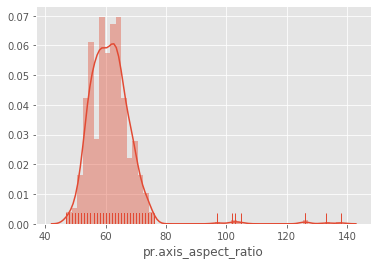

In [24]:
# Here, pr.axis_aspect_ratio is positively skewed.
sns.distplot(silhouette_data['pr.axis_aspect_ratio'],bins=50,rug=True)

In [25]:
# let's check min and max of pr.axis_aspect_ratio and skewness. And is positvely skewed.
print(f" Min of pr.axis_aspect_ratio : {silhouette_data['pr.axis_aspect_ratio'].describe()[3]}")
print(f" Max of pr.axis_aspect_ratio : {silhouette_data['scatter_ratio'].describe()[7]}")
print(f" Skew of pr.axis_aspect_ratio : {silhouette_data['pr.axis_aspect_ratio'].skew()}")

 Min of pr.axis_aspect_ratio : 47.0
 Max of pr.axis_aspect_ratio : 265.0
 Skew of pr.axis_aspect_ratio : 3.83036207531066


In [26]:
# lets replace NAN value with meadian from pr.axis_aspect_ratio and plot the graph.
axis_aspect_ratio_nan = pd.DataFrame(silhouette_data['pr.axis_aspect_ratio'].isna())
silhouette_data[axis_aspect_ratio_nan['pr.axis_aspect_ratio'] == True]


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
222,100,50.0,81.0,197.0,NaN,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus


pr.axis_aspect_ratio median value: 61.0


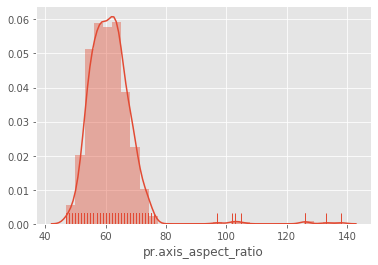

In [27]:
axis_aspect_ratio_medianValue = silhouette_data['pr.axis_aspect_ratio'].median()
print("pr.axis_aspect_ratio median value:",axis_aspect_ratio_medianValue)

silhouette_data['pr.axis_aspect_ratio'].fillna(axis_aspect_ratio_medianValue,inplace=True)
sns.distplot(silhouette_data['pr.axis_aspect_ratio'],bins=30,rug=True)


In [28]:
print("Number of NAN values :",silhouette_data['pr.axis_aspect_ratio'].isna().sum())
#After replacing nan
silhouette_data[axis_aspect_ratio_nan['pr.axis_aspect_ratio'] == True]

Number of NAN values : 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
19,101,56.0,100.0,215.0,61.0,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
222,100,50.0,81.0,197.0,61.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus


### -------------------------------------------------

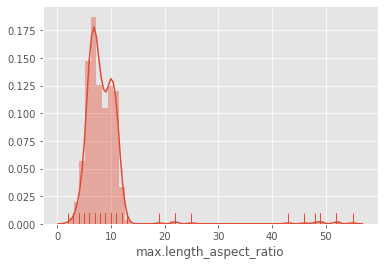

In [29]:
# Here, max.length_aspect_ratio is positively skewed.
sns.distplot(silhouette_data['max.length_aspect_ratio'],rug=True)

In [30]:

# let's check min and max of max.length_aspect_ratio and skewness.
print(f" Min of max.length_aspect_ratio : {silhouette_data['max.length_aspect_ratio'].describe()[3]}")
print(f" Max of max.length_aspect_ratio : {silhouette_data['scatter_ratio'].describe()[7]}")
print(f" Skew of max.length_aspect_ratio : {silhouette_data['max.length_aspect_ratio'].skew()}")

 Min of max.length_aspect_ratio : 2.0
 Max of max.length_aspect_ratio : 265.0
 Skew of max.length_aspect_ratio : 6.7783936191089476


### -------------------------------------------------

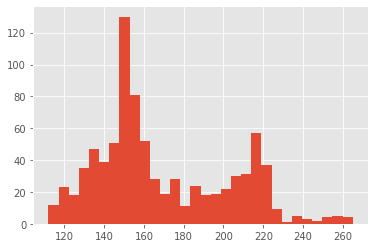

In [31]:
silhouette_data['scatter_ratio'] = pd.to_numeric(silhouette_data.scatter_ratio,errors='coerce')
silhouette_data.scatter_ratio.hist(bins=30)

In [32]:
# we consider this has normal distribution.
# let's check min and max of scatter_ratio and skewness. And is positvely skewed.
print(f" Min of scatter_ratio : {silhouette_data['scatter_ratio'].describe()[3]}")
print(f" Max of scatter_ratio : {silhouette_data['scatter_ratio'].describe()[7]}")
print(f" Skew of scatter_ratio : {silhouette_data['scatter_ratio'].skew()}")

 Min of scatter_ratio : 112.0
 Max of scatter_ratio : 265.0
 Skew of scatter_ratio : 0.6072705840142789


In [33]:
# lets replace NAN value with meadian from scatter_ratio and plot the graph.
scatter_ratio_nan = pd.DataFrame(silhouette_data['scatter_ratio'].isna())
silhouette_data[scatter_ratio_nan['scatter_ratio'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
249,85,34.0,53.0,127.0,58.0,6,NaN,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car


scatter_ratio median value: 157.0


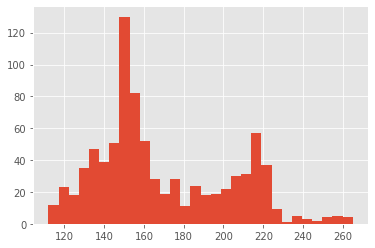

In [34]:
scatter_ratio_medianValue = silhouette_data['scatter_ratio'].median()
print("scatter_ratio median value:",scatter_ratio_medianValue)

silhouette_data['scatter_ratio'].fillna(scatter_ratio_medianValue,inplace=True)
silhouette_data.scatter_ratio.hist(bins=30)

In [35]:
print("Number of NAN values :",silhouette_data['scatter_ratio'].isna().sum())
#After replacing nan
silhouette_data[scatter_ratio_nan['scatter_ratio'] == True]

Number of NAN values : 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
249,85,34.0,53.0,127.0,58.0,6,157.0,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car


## -------------------------------------------------

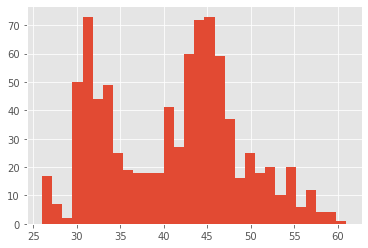

In [36]:
silhouette_data.elongatedness.hist(bins=30)

In [37]:
# we consider this has normal distribution.
# let's check min and max of elongatedness and skewness. And is positvely skewed(very less).
print(f" Min of elongatedness : {silhouette_data['elongatedness'].describe()[3]}")
print(f" Max of elongatedness : {silhouette_data['elongatedness'].describe()[7]}")
print(f" Skew of elongatedness : {silhouette_data['elongatedness'].skew()}")

 Min of elongatedness : 26.0
 Max of elongatedness : 61.0
 Skew of elongatedness : 0.04784701481809352


In [38]:
# lets replace NAN value with meadian from elongatedness and plot the graph.
elongatedness_nan = pd.DataFrame(silhouette_data['elongatedness'].isna())
silhouette_data[elongatedness_nan['elongatedness'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
215,90,39.0,86.0,169.0,62.0,7,162.0,NaN,20.0,131,194.0,388.0,147.0,74.0,1.0,22.0,185.0,191,car


elongatedness median value: 157.0


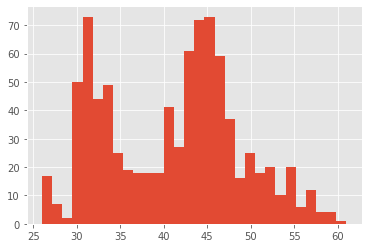

In [39]:
elongatedness_medianValue = silhouette_data['elongatedness'].median()
print("elongatedness median value:",scatter_ratio_medianValue)

silhouette_data['elongatedness'].fillna(elongatedness_medianValue,inplace=True)
silhouette_data.elongatedness.hist(bins=30)

In [40]:
print("Number of NAN values :",silhouette_data['elongatedness'].isna().sum())
#After replacing nan
silhouette_data[elongatedness_nan['elongatedness'] == True]

Number of NAN values : 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
215,90,39.0,86.0,169.0,62.0,7,162.0,43.0,20.0,131,194.0,388.0,147.0,74.0,1.0,22.0,185.0,191,car


## -------------------------------------------------

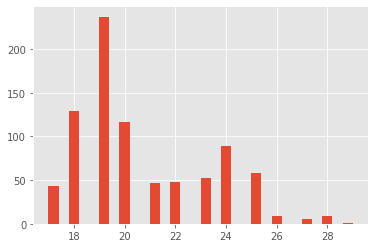

In [41]:
silhouette_data['pr.axis_rectangularity'].hist(bins=30)

In [42]:
# we consider this has normal distribution and this data is consist of descret values.
# let's check min and max of pr.axis_rectangularity and skewness
print(f" Min of pr.axis_rectangularity : {silhouette_data['pr.axis_rectangularity'].describe()[3]}")
print(f" Max of pr.axis_rectangularity : {silhouette_data['pr.axis_rectangularity'].describe()[7]}")
print(f" Skew of pr.axis_rectangularity : {silhouette_data['pr.axis_rectangularity'].skew()}")

 Min of pr.axis_rectangularity : 17.0
 Max of pr.axis_rectangularity : 29.0
 Skew of pr.axis_rectangularity : 0.7708887331289768


In [43]:
# lets replace NAN value with meadian from pr.axis_rectangularity and plot the graph.
axis_rectangularity_nan = pd.DataFrame(silhouette_data['pr.axis_rectangularity'].isna())
silhouette_data[axis_rectangularity_nan['pr.axis_rectangularity'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
237,85,45.0,65.0,128.0,56.0,8,151.0,45.0,NaN,145,170.0,332.0,186.0,81.0,1.0,10.0,179.0,184,bus
273,96,45.0,80.0,162.0,63.0,9,146.0,46.0,NaN,148,161.0,316.0,161.0,64.0,5.0,10.0,199.0,207,van


pr.axis_rectangularity median value: 20.0


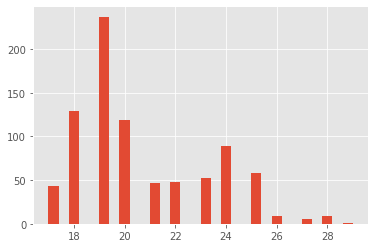

In [44]:
axis_rectangularity_medianValue = silhouette_data['pr.axis_rectangularity'].median()
print("pr.axis_rectangularity median value:",axis_rectangularity_medianValue)

silhouette_data['pr.axis_rectangularity'].fillna(axis_rectangularity_medianValue,inplace=True)
silhouette_data['pr.axis_rectangularity'].hist(bins=30)

In [45]:
print("Number of NAN values :",silhouette_data['pr.axis_rectangularity'].isna().sum())
#After replacing nan
silhouette_data[axis_rectangularity_nan['pr.axis_rectangularity'] == True]

Number of NAN values : 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,20.0,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
237,85,45.0,65.0,128.0,56.0,8,151.0,45.0,20.0,145,170.0,332.0,186.0,81.0,1.0,10.0,179.0,184,bus
273,96,45.0,80.0,162.0,63.0,9,146.0,46.0,20.0,148,161.0,316.0,161.0,64.0,5.0,10.0,199.0,207,van


## -------------------------------------------------

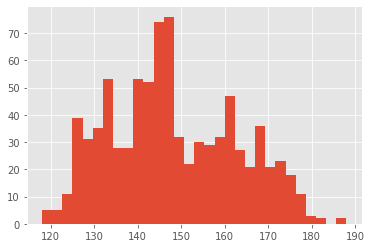

In [46]:
silhouette_data['max.length_rectangularity'].hist(bins=30)

In [47]:
# we do not see any NAN values in this data.
# and we can say max.length_rectangularity data is distributed normaly
# let's check min and max of max.length_rectangularity and skewness
print(f" Min of max.length_rectangularity : {silhouette_data['max.length_rectangularity'].describe()[3]}")
print(f" Max of max.length_rectangularity : {silhouette_data['max.length_rectangularity'].describe()[7]}")
print(f" Skew of max.length_rectangularity : {silhouette_data['max.length_rectangularity'].skew()}")

 Min of max.length_rectangularity : 118.0
 Max of max.length_rectangularity : 188.0
 Skew of max.length_rectangularity : 0.2563591641353724


## -------------------------------------------------

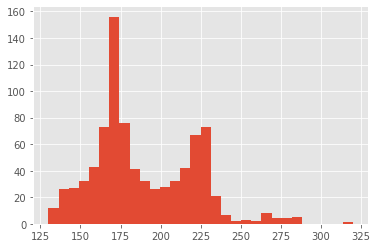

In [48]:
silhouette_data['scaled_variance'].hist(bins=30)

In [49]:
# we consider this has normal distribution and this data is consist of descret values.
# let's check min and max of scaled_variance and skewness. This is positively skewed. 
# The data is distributted bewteen 130 - around 290. the data point might be outlier.
print(f" Min of scaled_variance : {silhouette_data['scaled_variance'].describe()[3]}")
print(f" Max of scaled_variance: {silhouette_data['scaled_variance'].describe()[7]}")
print(f" Skew of scaled_variance : {silhouette_data['scaled_variance'].skew()}")

 Min of scaled_variance : 130.0
 Max of scaled_variance: 320.0
 Skew of scaled_variance : 0.6515982489177394


In [50]:
# lets replace NAN value with meadian from scaled_variance and plot the graph.
scaled_variance_nan = pd.DataFrame(silhouette_data['scaled_variance'].isna())
silhouette_data[scaled_variance_nan['scaled_variance'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
105,108,44.0,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
372,97,47.0,87.0,164.0,64.0,9,156.0,43.0,20.0,149,NaN,359.0,182.0,68.0,1.0,13.0,192.0,202,van
522,89,36.0,69.0,162.0,63.0,6,140.0,48.0,18.0,131,NaN,291.0,126.0,66.0,1.0,38.0,193.0,204,car


scaled_variance median value: 179.0


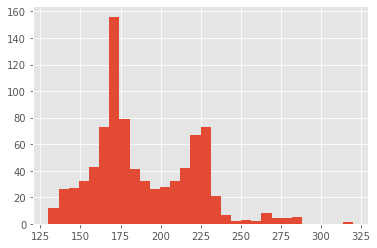

In [51]:
scaled_variance_medianValue = silhouette_data['scaled_variance'].median()
print("scaled_variance median value:",scaled_variance_medianValue)

silhouette_data['scaled_variance'].fillna(scaled_variance_medianValue,inplace=True)
silhouette_data['scaled_variance'].hist(bins=30)

## -------------------------------------------------

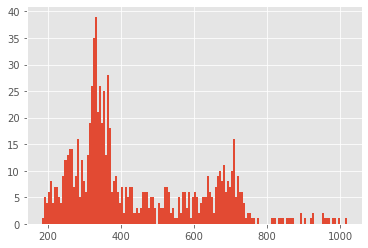

In [52]:
silhouette_data['scaled_variance.1'].hist(bins=150)

In [53]:
# we consider this has normal distribution.
# let's check min and max of scaled_variance.1 and skewness. This is positively skewed. 
print(f" Min of scaled_variance.1 : {silhouette_data['scaled_variance.1'].describe()[3]}")
print(f" Max of scaled_variance.1: {silhouette_data['scaled_variance.1'].describe()[7]}")
print(f" Skew of scaled_variance.1 : {silhouette_data['scaled_variance.1'].skew()}")

 Min of scaled_variance.1 : 184.0
 Max of scaled_variance.1: 1018.0
 Skew of scaled_variance.1 : 0.8420338539822296


In [54]:
# lets replace NAN value with meadian from scaled_variance.1 and plot the graph.
scaled_variance_1_nan = pd.DataFrame(silhouette_data['scaled_variance.1'].isna())
silhouette_data[scaled_variance_1_nan['scaled_variance.1'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
308,109,51.0,100.0,197.0,59.0,10,192.0,34.0,22.0,161,210.0,NaN,195.0,64.0,14.0,3.0,196.0,202,car
496,106,55.0,98.0,224.0,68.0,11,215.0,31.0,24.0,170,222.0,NaN,214.0,68.0,2.0,29.0,189.0,201,car


scaled_radius_of_gyration median value: 173.5


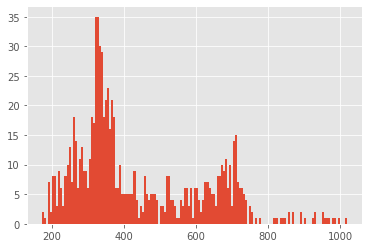

In [55]:
scaled_variance_1_medianValue = silhouette_data['scaled_radius_of_gyration'].median()
print("scaled_radius_of_gyration median value:",scaled_variance_1_medianValue)

silhouette_data['scaled_variance.1'].fillna(scaled_variance_1_medianValue,inplace=True)
silhouette_data['scaled_variance.1'].hist(bins=150)

## -------------------------------------------------

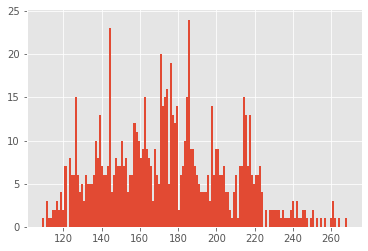

In [56]:
silhouette_data['scaled_radius_of_gyration'].hist(bins=150)

In [57]:
# we say data has normal distribution.
# let's check min and max of scaled_radius_of_gyration and skewness.
print(f" Min of scaled_radius_of_gyration : {silhouette_data['scaled_radius_of_gyration'].describe()[3]}")
print(f" Max of scaled_radius_of_gyration: {silhouette_data['scaled_radius_of_gyration'].describe()[7]}")
print(f" Skew of scaled_radius_of_gyration : {silhouette_data['scaled_radius_of_gyration'].skew()}")

 Min of scaled_radius_of_gyration : 109.0
 Max of scaled_radius_of_gyration: 268.0
 Skew of scaled_radius_of_gyration : 0.2793173322622561


In [58]:
# lets replace NAN value with meadian from scaled_variance.1 and plot the graph.
scaled_radius_of_gyration_nan = pd.DataFrame(silhouette_data['scaled_radius_of_gyration'].isna())
silhouette_data[scaled_radius_of_gyration_nan['scaled_radius_of_gyration'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
207,85,42.0,80.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus


scaled_radius_of_gyration median value: 173.5


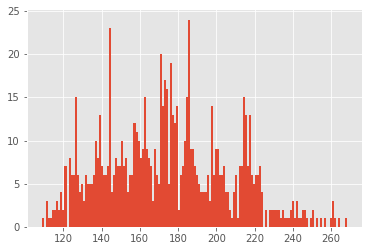

In [59]:
scaled_radius_of_gyration_medianValue = silhouette_data['scaled_radius_of_gyration'].median()
print("scaled_radius_of_gyration median value:",scaled_radius_of_gyration_medianValue)

silhouette_data['scaled_radius_of_gyration'].fillna(scaled_radius_of_gyration_medianValue,inplace=True)
silhouette_data['scaled_radius_of_gyration'].hist(bins=150)

## -------------------------------------------------

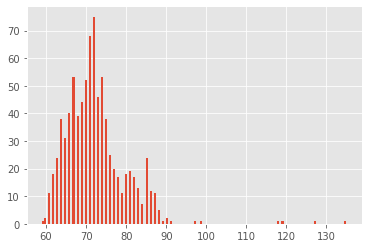

In [60]:
silhouette_data['scaled_radius_of_gyration.1'].hist(bins=150)

In [61]:
# we say data has not normally distributted.
# let's check min and max of scaled_radius_of_gyration and skewness. It is positively skewed.
# most of the data is distributted between 59 and 90. And others might be outliers.

print(f" Min of scaled_radius_of_gyration.1 : {silhouette_data['scaled_radius_of_gyration.1'].describe()[3]}")
print(f" Max of scaled_radius_of_gyration.1 : {silhouette_data['scaled_radius_of_gyration.1'].describe()[7]}")
print(f" Skew of scaled_radius_of_gyration.1 : {silhouette_data['scaled_radius_of_gyration.1'].skew()}")

 Min of scaled_radius_of_gyration.1 : 59.0
 Max of scaled_radius_of_gyration.1 : 135.0
 Skew of scaled_radius_of_gyration.1 : 2.083496485501098


In [62]:
# lets replace NAN value with meadian from scaled_radius_of_gyration.1 and plot the graph.
scaled_radius_of_gyration_1_nan = pd.DataFrame(silhouette_data['scaled_radius_of_gyration.1'].isna())
silhouette_data[scaled_radius_of_gyration_1_nan['scaled_radius_of_gyration.1'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
192,93,43.0,76.0,149.0,57.0,7,149.0,44.0,19.0,143,172.0,335.0,176.0,NaN,14.0,0.0,189.0,194,car
329,89,38.0,80.0,169.0,59.0,7,161.0,41.0,20.0,131,186.0,389.0,137.0,NaN,5.0,15.0,192.0,197,car


scaled_radius_of_gyration.1 median value: 71.5


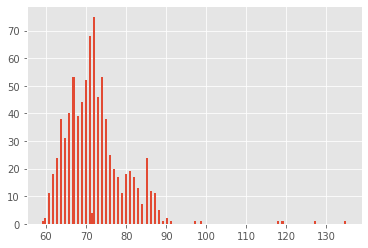

In [63]:
scaled_radius_of_gyration_1_medianValue = silhouette_data['scaled_radius_of_gyration.1'].median()
print("scaled_radius_of_gyration.1 median value:",scaled_radius_of_gyration_1_medianValue)

silhouette_data['scaled_radius_of_gyration.1'].fillna(scaled_radius_of_gyration_1_medianValue,inplace=True)
silhouette_data['scaled_radius_of_gyration.1'].hist(bins=150)

## -------------------------------------------------

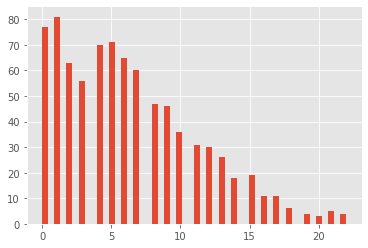

In [64]:
silhouette_data['skewness_about'].hist(bins=50)

In [65]:

# let's check min and max of skewness_about and skewness. It is positively skewed.
# most of the data is distributted between 0 and 22.

print(f" Min of skewness_about : {silhouette_data['skewness_about'].describe()[3]}")
print(f" Max of skewness_about : {silhouette_data['skewness_about'].describe()[7]}")
print(f" Skew of skewness_about : {silhouette_data['skewness_about'].skew()}")

 Min of skewness_about : 0.0
 Max of skewness_about : 22.0
 Skew of skewness_about : 0.7765187097549048


In [66]:
# lets replace NAN value with meadian from skewness_about and plot the graph.
skewness_about_nan = pd.DataFrame(silhouette_data['skewness_about'].isna())
silhouette_data[skewness_about_nan['skewness_about'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,71.5,NaN,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,NaN,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,NaN,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,61.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus
249,85,34.0,53.0,127.0,58.0,6,157.0,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,NaN,5.0,195.0,201,car


skewness_about median value: 6.0


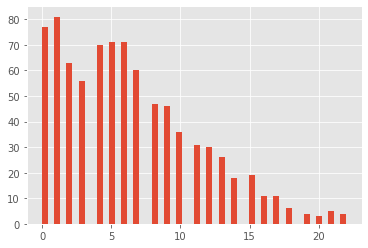

In [67]:
skewness_about_medianValue = silhouette_data['skewness_about'].median()
print("skewness_about median value:",skewness_about_medianValue)

silhouette_data['skewness_about'].fillna(skewness_about_medianValue,inplace=True)
silhouette_data['skewness_about'].hist(bins=50)

## -------------------------------------------------

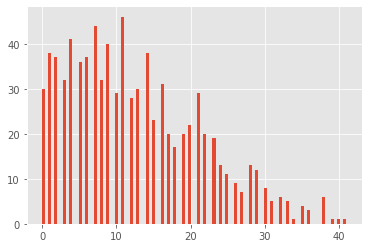

In [68]:
silhouette_data['skewness_about.1'].hist(bins=100)

In [69]:
# let's check min and max of skewness_about and skewness. It is positively skewed.
# most of the data is distributted between 0 and 41.

print(f" Min of skewness_about.1 : {silhouette_data['skewness_about.1'].describe()[3]}")
print(f" Max of skewness_about.1 : {silhouette_data['skewness_about.1'].describe()[7]}")
print(f" Skew of skewness_about.1 : {silhouette_data['skewness_about.1'].skew()}")

 Min of skewness_about.1 : 0.0
 Max of skewness_about.1 : 41.0
 Skew of skewness_about.1 : 0.6880171692243372


In [70]:
# lets replace NAN value with meadian from skewness_about and plot the graph.
skewness_about_1_nan = pd.DataFrame(silhouette_data['skewness_about.1'].isna())
silhouette_data[skewness_about_1_nan['skewness_about.1'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
105,108,44.0,103.0,202.0,64.0,10,220.0,30.0,25.0,168,179.0,711.0,214.0,73.0,11.0,NaN,188.0,199,car


skewness_about.1 median value: 11.0


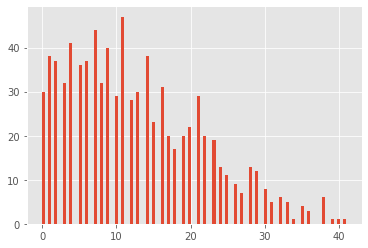

In [71]:
skewness_about_1_medianValue = silhouette_data['skewness_about.1'].median()
print("skewness_about.1 median value:",skewness_about_1_medianValue)

silhouette_data['skewness_about.1'].fillna(skewness_about_1_medianValue,inplace=True)
silhouette_data['skewness_about.1'].hist(bins=100)

## -------------------------------------------------

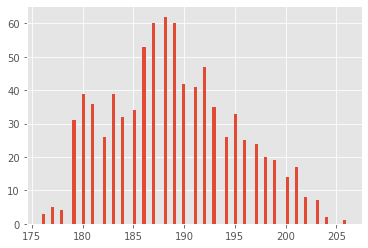

In [72]:
silhouette_data['skewness_about.2'].hist(bins=100)

In [73]:

# Data is normally distributted.
# let's check min and max of skewness_about.2 and skewness. 
# most of the data is distributted between 176 and 206.

print(f" Min of skewness_about.2 : {silhouette_data['skewness_about.2'].describe()[3]}")
print(f" Max of skewness_about.2 : {silhouette_data['skewness_about.2'].describe()[7]}")
print(f" Skew of skewness_about.2 : {silhouette_data['skewness_about.2'].skew()}")

 Min of skewness_about.2 : 176.0
 Max of skewness_about.2 : 206.0
 Skew of skewness_about.2 : 0.2493206901281248


In [74]:
# lets replace NAN value with meadian from skewness_about and plot the graph.
skewness_about_2_nan = pd.DataFrame(silhouette_data['skewness_about.2'].isna())
silhouette_data[skewness_about_2_nan['skewness_about.2'] == True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
419,93,34.0,72.0,144.0,56.0,6,133.0,50.0,18.0,123,158.0,263.0,125.0,63.0,5.0,20.0,NaN,206,car


skewness_about.2 median value: 188.0


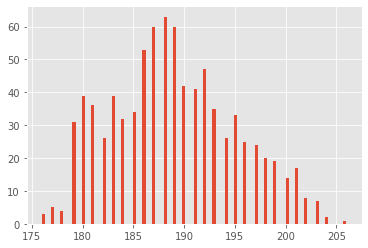

In [75]:
skewness_about_2_medianValue = silhouette_data['skewness_about.2'].median()
print("skewness_about.2 median value:",skewness_about_2_medianValue)

silhouette_data['skewness_about.2'].fillna(skewness_about_2_medianValue,inplace=True)
silhouette_data['skewness_about.2'].hist(bins=100)

## -------------------------------------------------

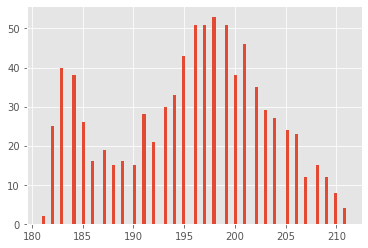

In [76]:
silhouette_data['hollows_ratio'].hist(bins=100)

In [77]:
# Data is normally distributted.
# let's check min and max of hollows_ratio and skewness. 
# most of the data is distributted between 181 and 211.

print(f" Min of hollows_ratio : {silhouette_data['hollows_ratio'].describe()[3]}")
print(f" Max of hollows_ratio : {silhouette_data['hollows_ratio'].describe()[7]}")
print(f" Skew of hollows_ratio : {silhouette_data['hollows_ratio'].skew()}")

 Min of hollows_ratio : 181.0
 Max of hollows_ratio : 211.0
 Skew of hollows_ratio : -0.22634128032982512


In [81]:
silhouette_data['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [88]:
replace_with_class = {"class": {"van":1,"car":2,"bus":3}}
replaced_data = silhouette_data.replace(replace_with_class)

In [92]:
print(replaced_data['class'].unique())
replaced_data.head()

[1 2 3]


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,2
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,3


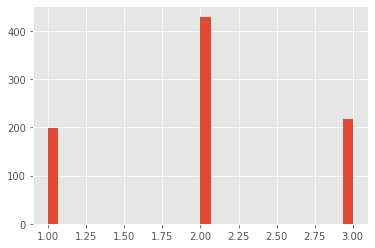

In [93]:
# let's check how the target data is distributted.
replaced_data['class'].hist(bins=30)